In [1]:
import numpy as np
import tensorflow as tf
import tensorlayer as tl

In [2]:
sess = tf.Session()
new_saver = tf.train.import_meta_graph('../checkpoint/dqn_best/model.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('../checkpoint/dqn_best'))

INFO:tensorflow:Restoring parameters from ../checkpoint/dqn_best/model


In [3]:
variables = tf.trainable_variables()
placeholders = [ op for op in sess.graph.get_operations() if op.type == "Placeholder"]

In [28]:
writer = tf.summary.FileWriter("output", sess.graph)
sess.run(variables[-1])
writer.close()

In [4]:
print(variables)
print(placeholders)

[<tf.Variable 'deepq/eps:0' shape=() dtype=float32_ref>, <tf.Variable 'deepq/q_func/convnet/Conv/weights:0' shape=(8, 8, 4, 32) dtype=float32_ref>, <tf.Variable 'deepq/q_func/convnet/Conv/biases:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'deepq/q_func/convnet/Conv_1/weights:0' shape=(4, 4, 32, 64) dtype=float32_ref>, <tf.Variable 'deepq/q_func/convnet/Conv_1/biases:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'deepq/q_func/convnet/Conv_2/weights:0' shape=(3, 3, 64, 64) dtype=float32_ref>, <tf.Variable 'deepq/q_func/convnet/Conv_2/biases:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'deepq/q_func/action_value/fully_connected/weights:0' shape=(9216, 256) dtype=float32_ref>, <tf.Variable 'deepq/q_func/action_value/fully_connected/biases:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'deepq/q_func/action_value/fully_connected_1/weights:0' shape=(256, 3) dtype=float32_ref>, <tf.Variable 'deepq/q_func/action_value/fully_connected_1/biases:0' shape=(3,) dtype=float32_ref>, <tf.Var

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

-1.2616758


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

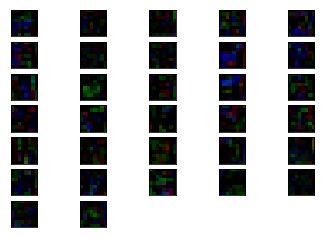

In [11]:
conv2d0 = variables[1]
conv2d1 = variables[4]

filters1 = conv2d0.eval(session=sess)[:, :, :-1, :]
print(filters1.min())

tl.visualize.CNN2d(
    filters1,
#     saveable=True,
    name='cnn1_sh',
    fig_idx=0,
)